#### Hi all.  🙋

#### Nice to meet you! 

#### We all know that feature engineering is the key to dynamically growing a model's performance in machine learning.

#### You will try a lot of thought and various methods when doing feature engineering! I'm going to suggest a lot of ways to reduce the trouble and process.

#### The methods I will introduce are both known and unfamiliar methods. I hope you will refer to them when conducting competitions on Kaggle in the future! 💯



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv')

In [ ]:
train = train[:10000]

In [ ]:
# data segmentation
X = train.drop(['target','id'], axis=1)
y = train['target']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0) # train, valid 8:2 분할

In [ ]:
# We need to duplicate the original state of our training data and test data.
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

# Functions that return training data and test data
def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x

## EDA

In [ ]:
train.head()

In [ ]:
train.isnull().sum()

In [ ]:
train_x.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['min'], cmap='Reds')\
                            .background_gradient(subset=['max'], cmap='coolwarm')

## The minimum value is 0 and the maximum value is 1.

In [ ]:
num_cols = [ 'f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18','f_29', 'f_30']

### Linear Transform

# Standardization

#### This is the most basic transformation method. 
#### It is a method that makes the mean 0 and the standard deviation 1 through a linear transformation!

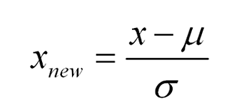

In [ ]:
# Load Data
train_x, test_x = load_data()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x[num_cols])

In [ ]:
# Permuting each column after normalization
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])

In [ ]:
## Before ormalization 

sns.distplot(train['f_07'],rug=True)
plt.show()

In [ ]:
## After ormalization 

sns.distplot(train_x['f_07'],rug=True)
plt.show()

<div style="background-color:red;border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">BAD Standardization</center></h1>
</div>

#### In this method, training data and test data are transformed according to the mean and standard deviation of different criteria. 

#### If the distribution of each data does not differ significantly from each other, it is not a problem. this method should not be used. 💥

In [ ]:
train_x, test_x = load_data()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize training data and test data respectively (bad example)
scaler_train = StandardScaler()
scaler_train.fit(train_x[num_cols])
train_x[num_cols] = scaler_train.transform(train_x[num_cols])

scaler_test = StandardScaler()
scaler_test.fit(test_x[num_cols])
test_x[num_cols] = scaler_test.transform(test_x[num_cols])

# Min-Max Scaling

#### This is a Min-Max Scaling method that converts the range taken by the variable value into a specific interval (between 0 and 1).

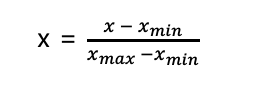

In [ ]:
train_x, test_x = load_data()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x[num_cols])

In [ ]:
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])

In [ ]:
## After ormalization 

sns.distplot(train_x['f_28'],rug=True)
plt.show()

In [ ]:
## After ormalization 

sns.distplot(train['f_28'],rug=True)
plt.show()

### Non-linear Transformation

# Yeo-Johnson Transform

#### Yeo-Johnson transform can also take negative values.

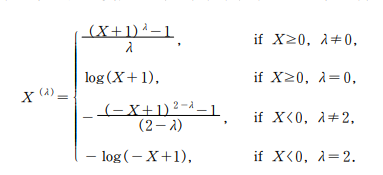

In [ ]:
train_x, test_x = load_data()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_x[num_cols])

In [ ]:
# 변환 후의 데이터로 각 열을 치환
train_x[num_cols] = pt.transform(train_x[num_cols])
test_x[num_cols] = pt.transform(test_x[num_cols])

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train.f_28,
    xbins=dict( # bins used for histogram
        start=-1000,
        end=1000
    ),
    marker_color='blue',
    opacity=1
))

fig.update_layout(
    title_text='f_28 yeo-johnson Before',
    xaxis_title_text='f_28',
    yaxis_title_text='Value', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train_x.f_28,
    xbins=dict( # bins used for histogram
        start=-1000,
        end=1000

    ),
    marker_color='blue',
    opacity=1
))

fig.update_layout(
    title_text='f_28 yeo-johnson After',
    xaxis_title_text='f_28',
    yaxis_title_text='Value', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


## The spread distribution was forced to approximate the normal distribution.

I think all the data is normalized for this competition

# Setting TransForm

# Clipping

#### Numerical variables sometimes include outliers, but you can exclude outliers 
#### outside a certain range by setting upper and lower limits and replacing values 
#### outside the range with upper and lower limits. It is also a good idea to check the distribution first and then set the threshold.

In [ ]:
train_x, test_x = load_data()

In [ ]:
# Check 1%, 99% points of training data per column
p01 = train_x[num_cols].quantile(0.01)
p99 = train_x[num_cols].quantile(0.99)

p01
p99

In [ ]:
# Values ​​below 1% point are clipped to 1% point, and values ​​above 99% point are clipped to 99% point.
train_x[num_cols] = train_x[num_cols].clip(p01, p99, axis=1)
test_x[num_cols] = test_x[num_cols].clip(p01, p99, axis=1)

In [ ]:
after_f_03 = train_x['f_03']
before_f_03 = train['f_03']

after_f_05 = train_x['f_05']
before_f_05 = train['f_05']

#### f_03 column before after comparison

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = before_f_03,
    xbins=dict( # bins used for histogram
        start=0,
        end=200,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='f_03 Clipping Before',
    xaxis_title_text='f_03',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = after_f_03,
    xbins=dict( # bins used for histogram
        start=0,
        end=200
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='f_06 Clipping After',
    xaxis_title_text='f_06',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


## 0~80까지의 값들이 치환 되었다.

#### f_05 column before after comparison

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = before_f_05,
    xbins=dict( # bins used for histogram
        start=-1,
        end=1,
        size=1
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='f_05 Clipping Before',
    xaxis_title_text='f_05',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = after_f_05,
    xbins=dict( # bins used for histogram
        start=0,
        end=560,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='f_05 Clipping After',
    xaxis_title_text='f_05',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

#### If you look at the graph, you can clearly see that the values ​​are not spread widely but are clustered like a normal distribution.

# Rank Gauss

#### This is a method of converting numeric variables into ranks and then semi-forced normal 
#### distributions while maintaining the order. The method used by Kaggle Grandmaster 
#### Michael Jahrer was revealed in the 1st solution in Porto Seguro's Safe Driver Prediction competition. 
#### In particular, it is said to have better performance than general standardization as a transformation when building a model in a neural network.

In [ ]:
train_x, test_x = load_data()

from sklearn.preprocessing import QuantileTransformer

In [ ]:
transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(train_x[num_cols])

In [ ]:
train_x[num_cols] = transformer.transform(train_x[num_cols])
test_x[num_cols] = transformer.transform(test_x[num_cols])

In [ ]:
p = sns.boxplot(x=train.f_05, color = 'teal')
p.set_title("f_05 RankGauss Before")
plt.show()

In [ ]:
p = sns.boxplot(x=train_x.f_05, color = 'teal')
p.set_title("f_05 RankGauss After")
plt.show()

#### The values ​​were semi-forced to be normally distributed. The impact of outliers is also expected to decrease.